<h2>Analisi esplorativa</h2>

<h4>Librerie Necessarie:</h4>

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE

<h4>Lettura del DataFrame:</h4>

In [220]:
df = pd.read_csv("../data/star_classification.csv")

In [221]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

<h4>Come possiamo notare, non abbiamo valori nulli. Ottimo per poterci alleggerire la fase di pulizia dei dati</h4>

In [223]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


<h3>1. PULIZIA DEI DATI</h3>

<h4>Rinominazione delle colonne: u, g, r, i, z, al fine di garantire maggiore chiarezza dei dati</h4>

In [224]:
df.rename(columns={
    "u": "ultraviolet",
    "g": "green",
    "r": "red",
    "i": "near_infrared",
    "z": "infrared"
}, inplace=True) # con il valore andiamo ad indicare di andare a modificare il dataframe originale, senza creare una copia

<p>Spiegazione colonne DataFrame: </p>
<ul>
    <li>Alpha e delta: posizione dell'oggetto nel cielo</li>
    <li>U, g, r, i, z: spettro di luce che emana l'oggetto</li>
    <li>Class: classificazione dell'oggetto</li>
    <li>Redshift: misura quanto la luce di un oggetto è spostato verso il rosso rispetto a come viene emessa</li>
    <li>Plate: tipo di fibra usato nell'obbiettivo</li>
    <li>MJD: data in cui è stata scattata la foto, basandosi sul calendario Giuliano modificato</li>
</ul>

<h4>Eliminazione colonne superflue per l'esplorazione dei dati</h4>

In [225]:
uselessColumns = ['run_ID', 'rerun_ID', 'cam_col', 'fiber_ID', 'field_ID']
df = df.drop(uselessColumns, axis=1)

print(f"Sono state cancellate le seguenti colonne: {uselessColumns}")

Sono state cancellate le seguenti colonne: ['run_ID', 'rerun_ID', 'cam_col', 'fiber_ID', 'field_ID']


<h4>Eliminazione righe dove contengono valori sentinella. Essi sbilanciano di molto analisi future, meglio rimuoverle</h4>

In [226]:
df = df[
    (df["ultraviolet"] > -1000) &
    (df["green"] > -1000) &
    (df["infrared"] > -1000)
]

In [227]:
df.describe()

,obj_ID,alpha,delta,ultraviolet,green,red,near_infrared,infrared,spec_obj_ID,redshift,plate,MJD
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,9.999900e+04,99999.000000,99999.000000,99999.000000
mean,1.237665e+18,177.628653,24.135552,22.080679,20.631583,19.645777,19.084865,18.768988,5.783903e+18,0.576667,5137.027890,55588.653687
std,8.438450e+12,96.502612,19.644608,2.251068,2.037384,1.854763,1.757900,1.765982,3.324026e+18,0.730709,2952.312485,1808.492217
min,1.237646e+18,0.005528,-18.785328,10.996230,10.498200,9.822070,9.469903,9.612333,2.995191e+17,-0.009971,266.000000,51608.000000
25%,1.237659e+18,127.517698,5.147477,20.352410,18.965240,18.135795,17.732280,17.460830,2.844137e+18,0.054522,2526.000000,54234.000000
50%,1.237663e+18,180.900527,23.646462,22.179140,21.099930,20.125310,19.405150,19.004600,5.614896e+18,0.424176,4987.000000,55869.000000
75%,1.237668e+18,233.895005,39.901582,23.687480,22.123775,21.044790,20.396510,19.921120,8.332365e+18,0.704172,7400.500000,56777.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,1.412694e+19,7.011245,12547.000000,58932.000000


<h3>2. Analisi Esplorativa Dei Dati</h3>

<h4>A. Contiamo le ricorrenze della colonna target "class"</h4>

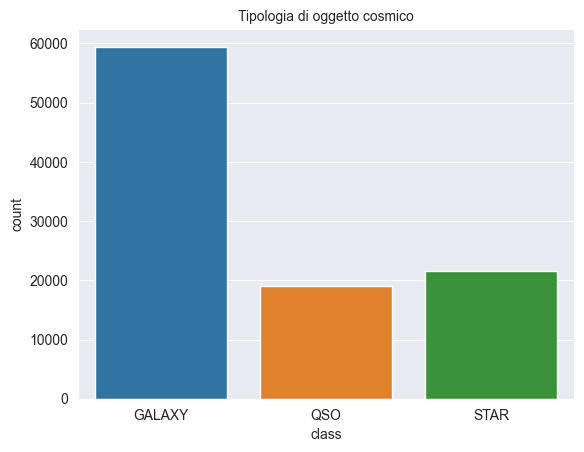

In [228]:
sns.countplot(data=df, x="class", hue="class")
plt.title("Tipologia di oggetto cosmico",fontsize=10)
plt.show()

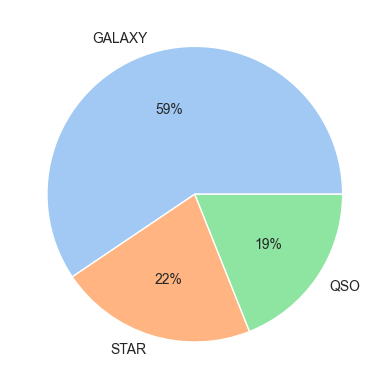

class
GALAXY    59445
STAR      21593
QSO       18961
Name: count, dtype: int64

In [229]:
data = df["class"].value_counts()
labels = ['GALAXY', 'STAR', 'QSO']
# define Seaborn color palette to use
colors = sns.color_palette('pastel')

# plotting data on chart
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')
plt.show()
data

<h5>Possiamo notare come la classe prioritaria "GALAXY" sia circa il 60% dei dati complessivi, rispetto alle altre due minoritarie molto simili, "START" e "QSO", che si attestano intorno al 20%. Il DataSet non presenta un forte sbilanciamento.</h5>

<h4>B. Stampiamo la HEATMAP per verificare la correlazione delle variabili</h4>

<h5>Applichiamo una funzione encoder sulle colonne non numeriche</h5>

In [230]:
def encode_class(value):
    if value == "GALAXY":
        return 0
    elif value == "STAR":
        return 1
    else:
        return 2
    
df_encoded = df.copy()
df_encoded["class"] = df_encoded["class"].apply(encode_class)

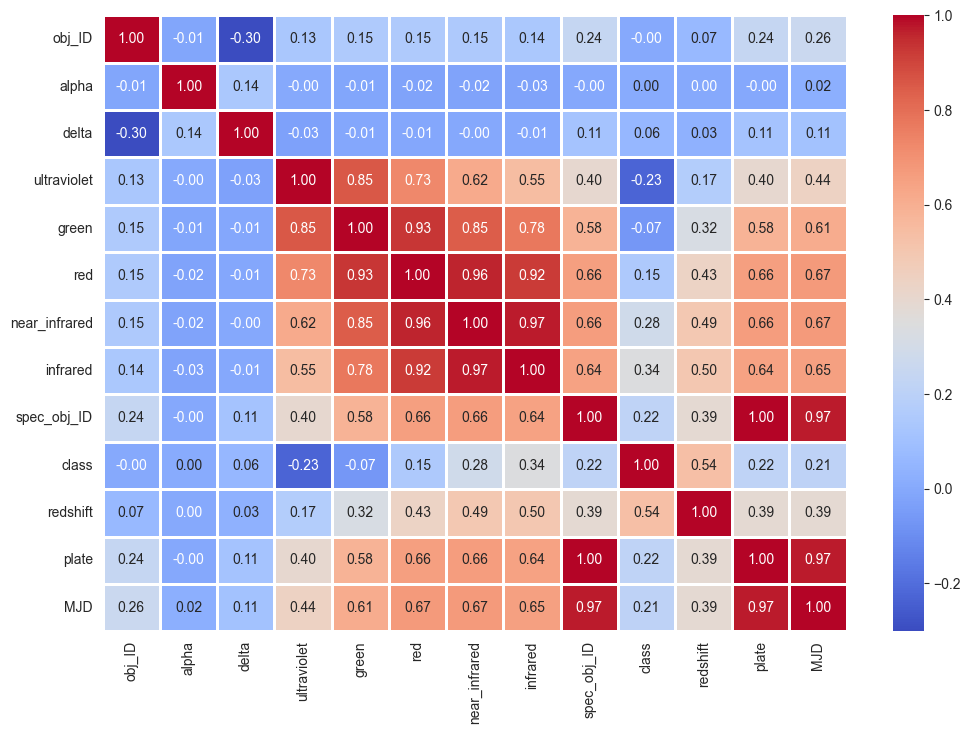

In [231]:
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=True, linewidths=1, fmt= '.2f',ax=ax)
plt.show()

<h4>C. Istogramma bande magnitudinali</h4>

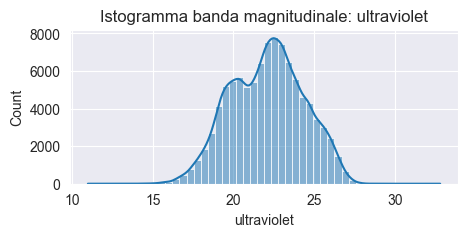

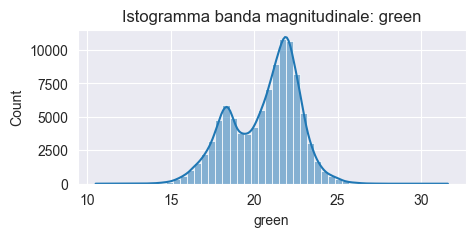

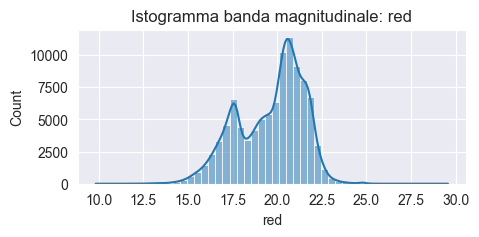

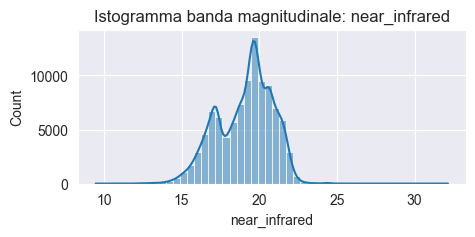

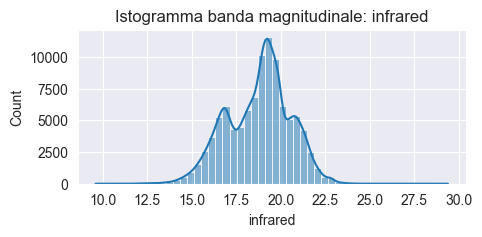

In [232]:
data = df[["ultraviolet", "green", "red", "near_infrared", "infrared"]].copy()



for d in data.columns:
    plt.figure(figsize=(5, 2))
    sns.histplot(x=data[d], kde=True, bins=50)
    plt.title(f"Istogramma banda magnitudinale: {d}")
    plt.show()

<h4>D. Mostriamo come, tramite scatterplot, la luminosità degli oggetti stellari cambia in relazione alla loro distanza</h4>

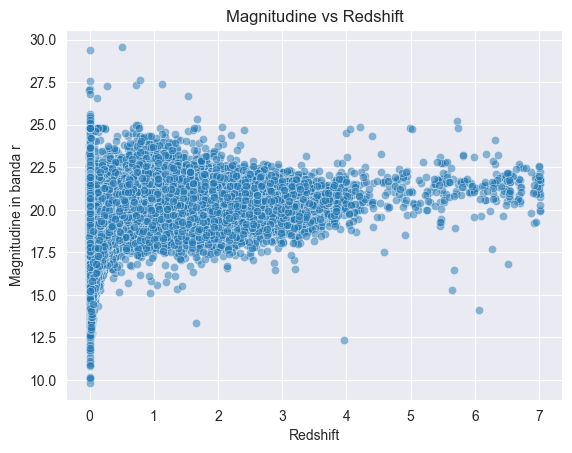

In [233]:
sns.scatterplot(data=df, x="redshift", y="red", alpha=0.5)
plt.xlabel("Redshift")
plt.ylabel("Magnitudine in banda r")
plt.title("Magnitudine vs Redshift")
plt.show()


<h4>E. Classificazione oggetti stellari tramite le loro bande</h4>
<h5>Ogni stella, viene categorizzata in valori O/B, A, F, G, K, M. Essi definiscono il tipo spettrale</h5>

In [234]:
stars = df[df["class"] == "STAR"].copy()

In [235]:
stars["u_g"] = stars["ultraviolet"] - stars["green"]
stars["g_r"] = stars["green"] - stars["red"]
stars["r_i"] = stars["red"] - stars["near_infrared"]
stars["i_z"] = stars["near_infrared"] - stars["infrared"]

In [236]:
def spectral_type_from_gr(g_r):
    if g_r < -0.2:
        return "O/B"
    elif g_r < 0.0:
        return "A"
    elif g_r < 0.3:
        return "F"
    elif g_r < 0.6:
        return "G"
    elif g_r < 1.0:
        return "K"
    else:
        return "M"
    
stars["spectral_type"] = stars["g_r"].apply(spectral_type_from_gr)

order = ["O/B", "A", "F", "G", "K", "M"]

stars["spectral_type"] = pd.Categorical(
    stars["spectral_type"],
    categories=order,
    ordered=True
)

In [237]:
stars[["obj_ID", "alpha", "delta", "ultraviolet", "green", "red", "g_r", "spectral_type"]].head()

,obj_ID,alpha,delta,ultraviolet,green,red,g_r,spectral_type
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,0.85940,K
12,1.237681e+18,345.801874,32.672868,23.17274,20.14496,19.41948,0.72548,K
16,1.237679e+18,353.201522,3.080796,24.54890,21.44267,20.95315,0.48952,G
18,1.237679e+18,14.383135,3.214326,21.82154,20.55730,19.94918,0.60812,K
21,1.237658e+18,144.785293,46.826496,24.54793,22.33601,20.92259,1.41342,M


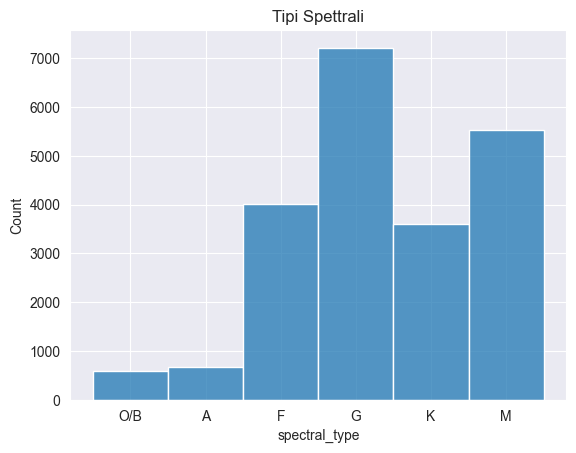

In [238]:
sns.histplot(x=stars["spectral_type"])
plt.title("Tipi Spettrali")
plt.show()

<h5>La maggior parte di stelle all'interno del nostro DATASET hanno tipo spettrale G, simili al nostro sole!</h5>
<h5>La temperatura si aggira circa tra i 5.300 k e i 6.000 k</h5>

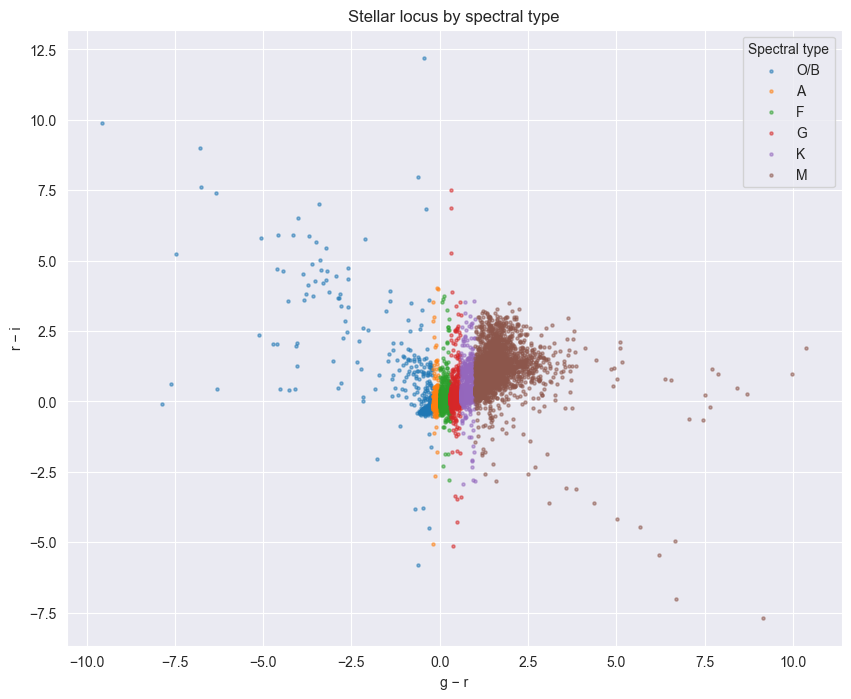

In [239]:
plt.figure(figsize=(10,8))

for t in ["O/B", "A", "F", "G", "K", "M"]:
    sub = stars[stars["spectral_type"] == t]
    plt.scatter(sub["g_r"], sub["r_i"], s=5, alpha=0.5, label=t)

plt.xlabel("g − r")
plt.ylabel("r − i")
plt.title("Stellar locus by spectral type")
plt.legend(title="Spectral type")
plt.show()

<h4>F. Stima della temperatura efficace delle stelle</h4>


<h5>La formula sottostante, è una relazione empirica usata per stimare la temperatura efficace di una stella, basandosi sulla banda g_r</h5>

T<sub>eff</sub> = 10<sup>w<sub>1</sub>(g − r) + w<sub>0</sub></sup>

In [240]:
stars = stars[stars["g_r"].between(-0.3, 1.0)]

In [241]:
stars["Teff_K"] = 10 ** (3.877 - 0.26 * stars["g_r"])

In [242]:
stars["Teff_K"].describe()

count    15673.000000
mean      5929.836756
std        906.912529
min       4140.046319
25%       5312.931297
50%       5930.850816
75%       6403.007345
max       9014.092285
Name: Teff_K, dtype: float64

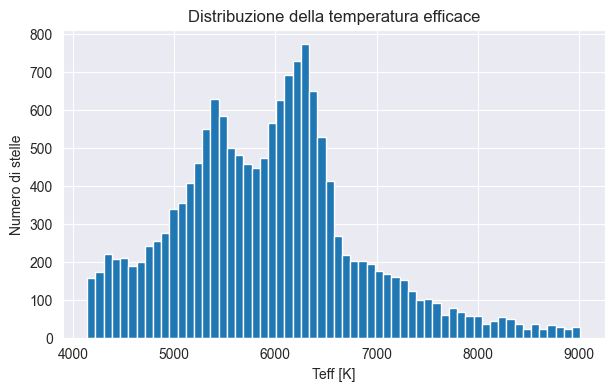

In [243]:
plt.figure(figsize=(7,4))
plt.hist(stars["Teff_K"], bins=60)
plt.xlabel("Teff [K]")
plt.ylabel("Numero di stelle")
plt.title("Distribuzione della temperatura efficace")
plt.show()

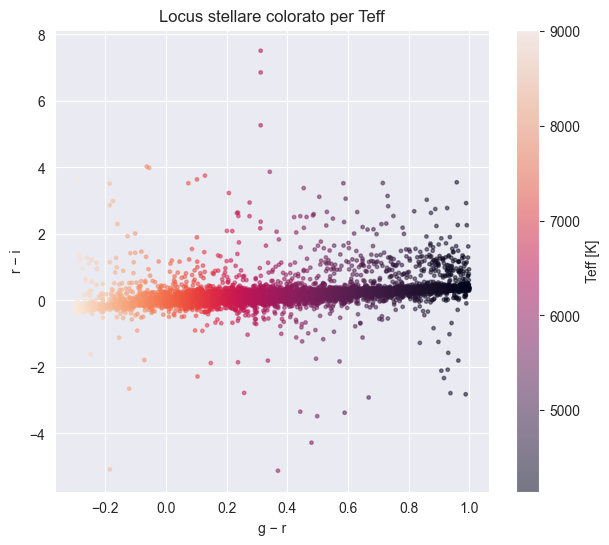

In [244]:
stars["r_i"] = stars["red"] - stars["near_infrared"]

plt.figure(figsize=(7,6))
sc = plt.scatter(
    stars["g_r"],
    stars["r_i"],
    c=stars["Teff_K"],
    s=6,
    alpha=0.5
)
plt.xlabel("g − r")
plt.ylabel("r − i")
plt.title("Locus stellare colorato per Teff")
plt.colorbar(sc, label="Teff [K]")
plt.show()

In [245]:
gal = df[df["class"] == "GALAXY"].copy()

In [246]:
gal["g_r"] = gal["green"] - gal["red"]

In [247]:
gal["color_class"] = np.where(
    gal["g_r"] < 0.6,
    "Blue",
    "Red"
)

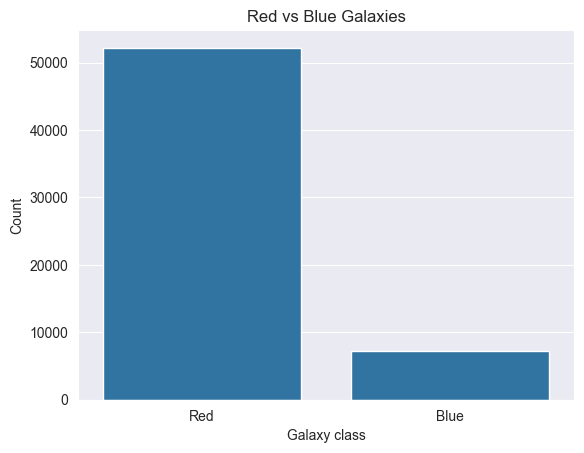

In [248]:
sns.countplot(x="color_class", data=gal)
plt.xlabel("Galaxy class")
plt.ylabel("Count")
plt.title("Red vs Blue Galaxies")
plt.show()

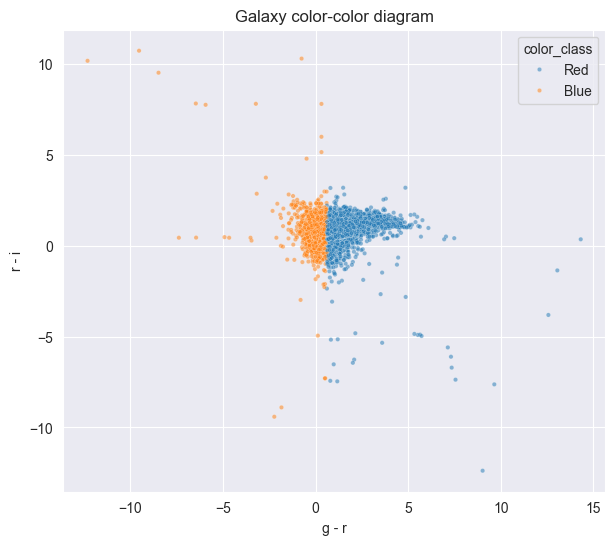

In [249]:
gal["r_i"] = gal["red"] - gal["near_infrared"]

plt.figure(figsize=(7,6))
sns.scatterplot(
    x="g_r",
    y="r_i",
    hue="color_class",
    data=gal,
    s=10,
    alpha=0.5
)
plt.xlabel("g - r")
plt.ylabel("r - i")
plt.title("Galaxy color-color diagram")
plt.show()

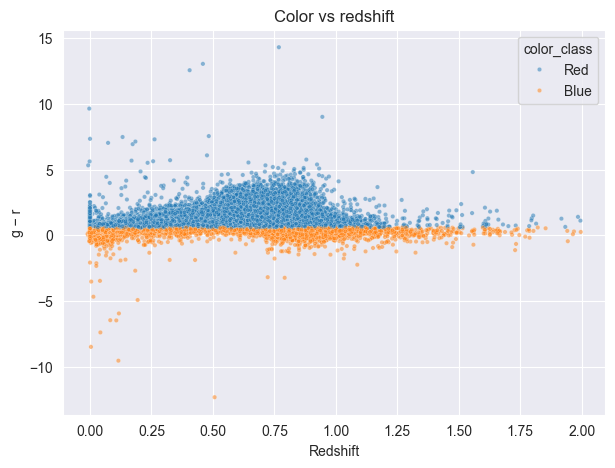

In [250]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="redshift",
    y="g_r",
    hue="color_class",
    data=gal,
    s=10,
    alpha=0.5
)
plt.xlabel("Redshift")
plt.ylabel("g − r")
plt.title("Color vs redshift")
plt.show()

In [251]:
qso = df[df["class"] == "QSO"].copy()

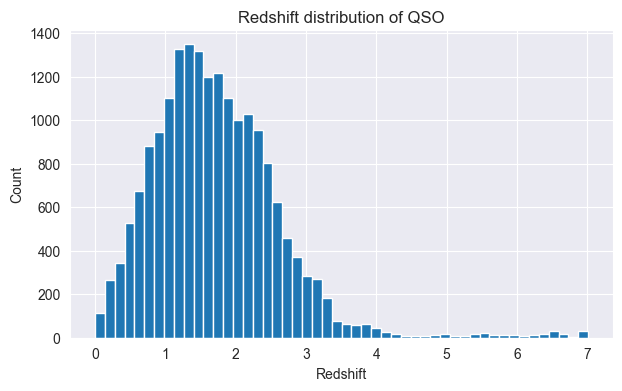

In [252]:
plt.figure(figsize=(7,4))
plt.hist(qso["redshift"], bins=50)
plt.xlabel("Redshift")
plt.ylabel("Count")
plt.title("Redshift distribution of QSO")
plt.show()

In [253]:
qso["u_g"] = qso["ultraviolet"] - qso["green"]
qso["g_r"] = qso["green"] - qso["red"]

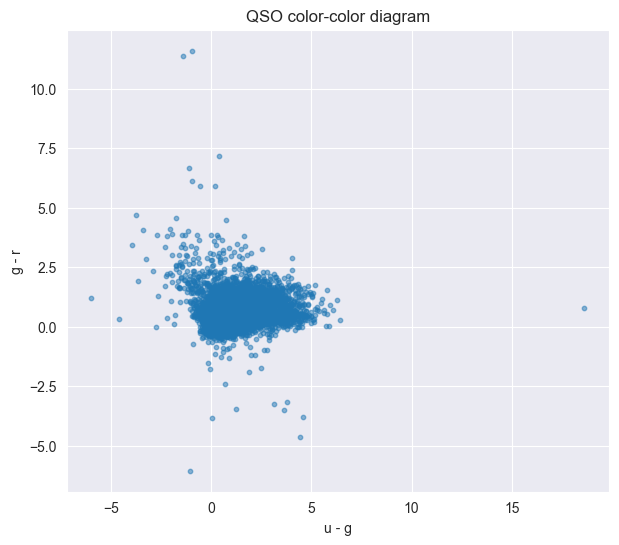

In [254]:
plt.figure(figsize=(7,6))
plt.scatter(qso["u_g"], qso["g_r"], s=10, alpha=0.5)
plt.xlabel("u - g")
plt.ylabel("g - r")
plt.title("QSO color-color diagram")
plt.show()

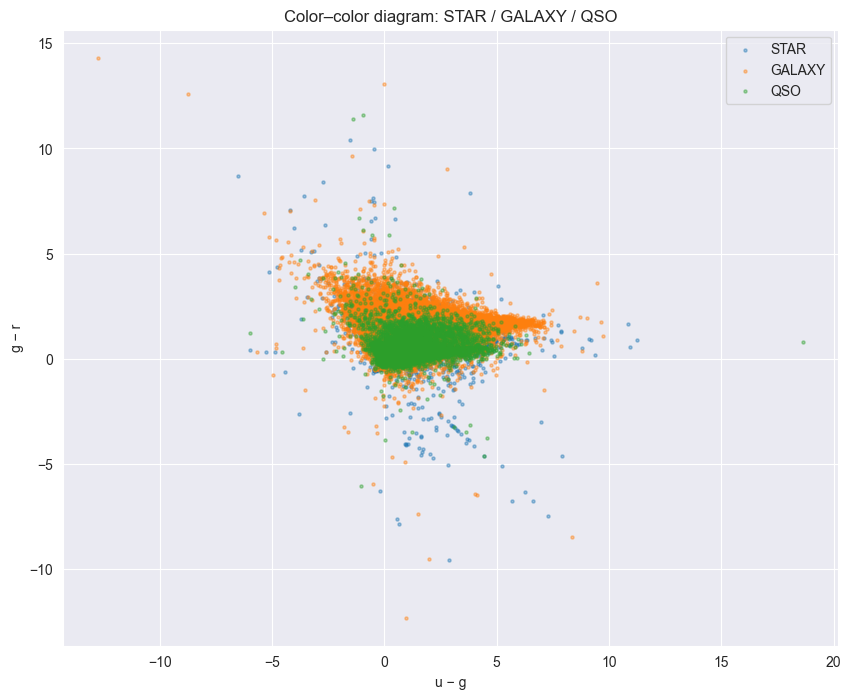

In [255]:
plt.figure(figsize=(10,8))

for cls, color in zip(["STAR", "GALAXY", "QSO"], ["gray", "blue", "red"]):
    sub = df[df["class"] == cls]
    plt.scatter(
        sub["ultraviolet"] - sub["green"],
        sub["green"] - sub["red"],
        s=5,
        alpha=0.4,
        label=cls
    )

plt.xlabel("u − g")
plt.ylabel("g − r")
plt.legend()
plt.title("Color–color diagram: STAR / GALAXY / QSO")
plt.show()

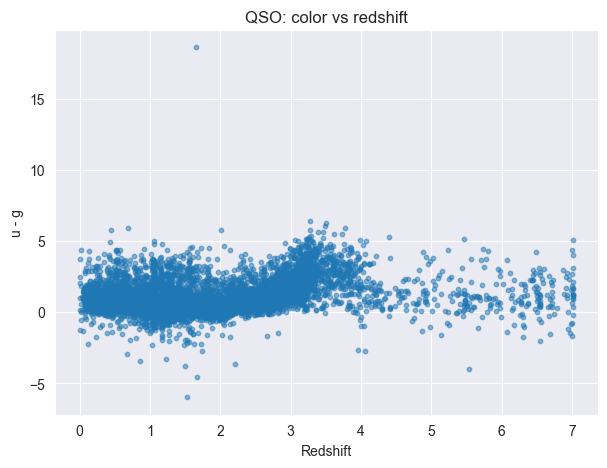

In [256]:
plt.figure(figsize=(7,5))
plt.scatter(qso["redshift"], qso["u_g"], s=10, alpha=0.5)
plt.xlabel("Redshift")
plt.ylabel("u - g")
plt.title("QSO: color vs redshift")
plt.show()

<h2>3. Classificazione</h2>

<h4>A.1 Classificazione con modello LogisticRegression, per la previsione della colonna target "class"</h4>

<h5>A fine addestramento, il modello dovrà essere in grado di saper distinguere, tramite le colonne su cui verrà trainato, i vari oggetti stellati presenti nel nostro dataset: STAR, GALAXY e QSO</h5>

Precisione rilevata: 0.96


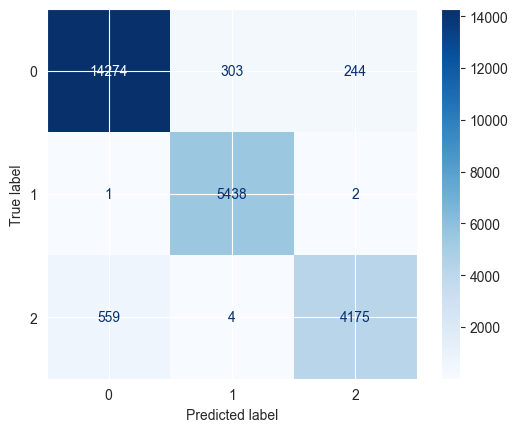

In [257]:
df_class = df.copy()

df_class["class"]=[0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in df["class"]]

df_class = df_class.drop(["obj_ID", "alpha", "delta", "spec_obj_ID", "plate", "MJD"], axis=1)

X = df_class.drop(["class"], axis=1)
y = df_class.loc[:,'class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logistic_clf = LogisticRegression(random_state = 0)
logistic_clf.fit(X_train, y_train)

y_pred = logistic_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Precisione rilevata: {:.2f}".format(accuracy_score(y_test, y_pred)))

ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.show()

<h5>Come possiamo vedere dalla precisione rilevata e dalla confusion matrix, il modello è stato addestrato correttamente, avendo una precisione di 0.96</h5>

<h4>Gli unici errori che commette il modello, è quello di non riuscire ad avere una precisione ottimale sulla distinzione tra START e QSO, per via di dati molto simili tra loro e classi sbilanciate</h4>

<h4>A.2 Allenamento modello con classi bilanciate con modello SMOTE</h4>

Precisione rilevata: 0.95


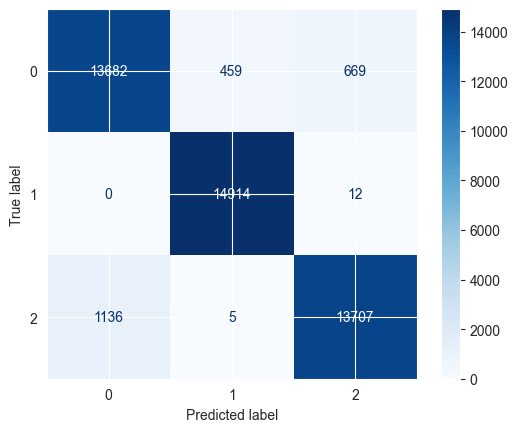

In [258]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_balanced, y_balanced, test_size = 0.25, random_state = 0)

scaler = StandardScaler()
X_train_b = scaler.fit_transform(X_train_b)
X_test_b = scaler.transform(X_test_b)

logistic_clf = LogisticRegression(random_state = 0)
logistic_clf.fit(X_train_b, y_train_b)

y_pred_b = logistic_clf.predict(X_test_b)

cm = confusion_matrix(y_test_b, y_pred_b)
print("Precisione rilevata: {:.2f}".format(accuracy_score(y_test_b, y_pred_b)))

ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.show()

<h4>Precisione leggermente calata, solamente dello 0.01. Mentre, quello che bisogna notare è come il modello con classi bilanciate, ha abbassato il tasso di errore tra STAR e QSO</h4>

<h2>4. Regressione</h2>

<h4>Tramite il modello RandomForest, stimiamo il redshift fotometrico delle GALAXY e QSO</h4>

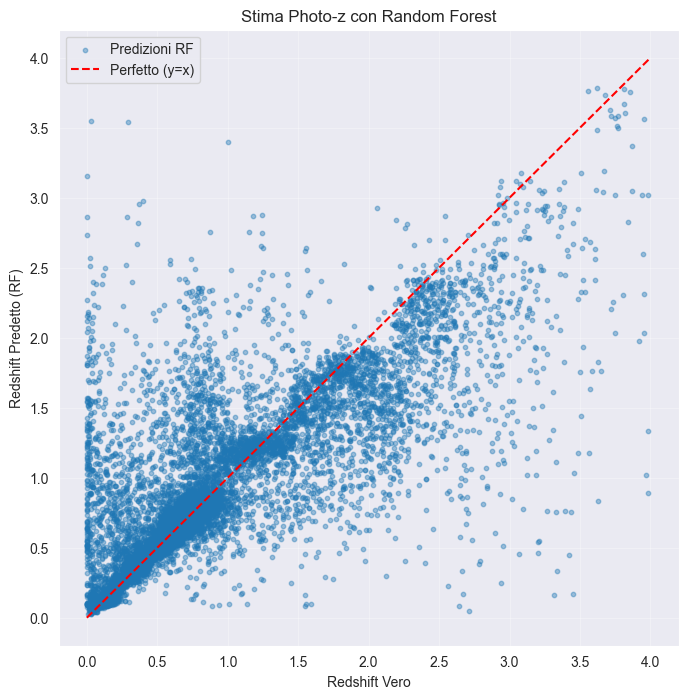

Errore Medio Assoluto (MAE): 0.1887
Coefficiente di Determinazione (R2): 0.6629


In [259]:
gal_qso = df[df["class"].isin(["GALAXY", "QSO"])].copy()
gal_qso = gal_qso[(gal_qso["redshift"] >= 0) & (gal_qso["redshift"] <= 4)].copy()

gal_qso["u_g"] = gal_qso["ultraviolet"] - gal_qso["green"]
gal_qso["g_r"] = gal_qso["green"] - gal_qso["red"]
gal_qso["r_i"] = gal_qso["red"] - gal_qso["near_infrared"]
gal_qso["i_z"] = gal_qso["near_infrared"] - gal_qso["infrared"]

X = gal_qso[["u_g", "g_r", "r_i", "i_z"]]
y = gal_qso["redshift"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

model_rf = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=0)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.4, s=10, label="Predizioni RF")

# Aggiungiamo la linea di riferimento ideale (rossa)
lims = [0, 4]
plt.plot(lims, lims, color="red", linestyle="--", label="Perfetto (y=x)")

plt.xlabel("Redshift Vero")
plt.ylabel("Redshift Predetto (RF)")
plt.title("Stima Photo-z con Random Forest")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Errore Medio Assoluto (MAE): {mae:.4f}")
print(f"Coefficiente di Determinazione (R2): {r2:.4f}")

<h4>Risultato grafico:</h4>
<ul>
    <li>Sull'asse X sono presenti i redshift reali, dati presenti del dataset</li>
    <li>Sull'asse Y sono presenti i redshift predetti dal modello RandomForest</li>
    <li>I punti blu rappresentano gli oggetti</li>
    <li>La linea rossa rappresenta la stima perfetta. Più i punti si trovano in prossimità di essa, più si può considerare il modello preciso</li>
</ul>

<h4>Notiamo come fino al REDSHIFT 2.0, il modello è molto denso sulla retta. Successivamente inizia a disperdersi. Alla fine dell'addestramento, abbiamo ottenuto una precisione di 0.66 e un MAE di 0.19</h4>

In [260]:
df

,obj_ID,alpha,delta,ultraviolet,green,red,near_infrared,infrared,spec_obj_ID,class,redshift,plate,MJD
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,6.543777e+18,GALAXY,0.634794,5812,56354
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,1.176014e+19,GALAXY,0.779136,10445,58158
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,5.152200e+18,GALAXY,0.644195,4576,55592
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,1.030107e+19,GALAXY,0.932346,9149,58039
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,6.891865e+18,GALAXY,0.116123,6121,56187
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,1.055431e+19,GALAXY,0.000000,9374,57749
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,8.586351e+18,GALAXY,0.404895,7626,56934
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,3.112008e+18,GALAXY,0.143366,2764,54535
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,7.601080e+18,GALAXY,0.455040,6751,56368


In [261]:
df_clust = df.copy()

df_clust["u_g"] = df_clust["ultraviolet"] - df_clust["green"]
df_clust["g_r"] = df_clust["green"] - df_clust["red"]
df_clust["r_i"] = df_clust["red"] - df_clust["near_infrared"]
df_clust["i_z"] = df_clust["near_infrared"] - df_clust["infrared"]

X = df_clust[["u_g", "g_r", "r_i", "i_z"]]

In [262]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Varianza spiegata:", pca.explained_variance_ratio_)

Varianza spiegata: [0.47302184 0.23464946]


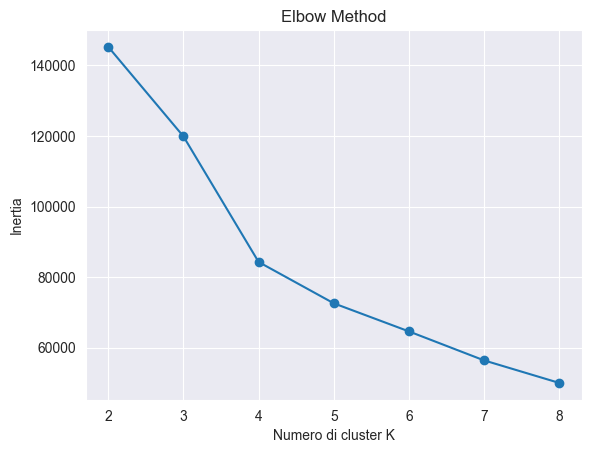

In [263]:
inertia = []
K_range = range(2, 9)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_pca)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, marker="o")
plt.xlabel("Numero di cluster K")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

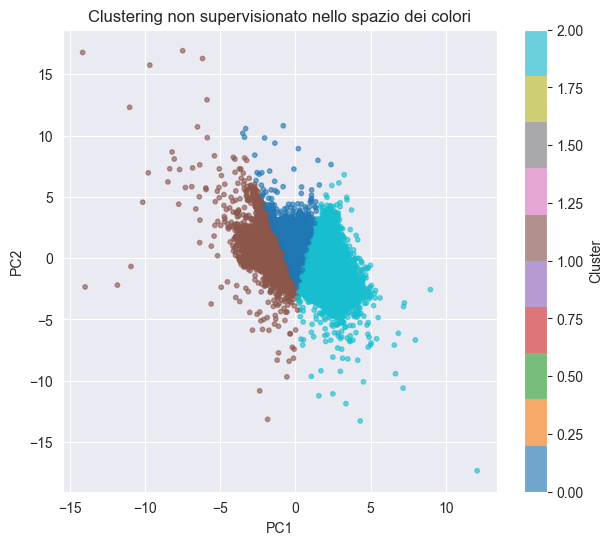

In [264]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

df_clust["cluster"] = clusters

plt.figure(figsize=(7,6))
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=clusters,
    cmap="tab10",
    s=10,
    alpha=0.6
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clustering non supervisionato nello spazio dei colori")
plt.colorbar(label="Cluster")
plt.show()